In [4]:
conda install -c intel scikit-learn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


# Ecenario 3

In [1]:
import string

import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score

In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
stop_words = set(stopwords.words('spanish'))

In [4]:
def tokenizer(text):
    tt = TweetTokenizer()
    return tt.tokenize(text)

### Cargando tweets etiquetados

In [5]:
# Dataset loaded from: https://docs.google.com/spreadsheets/d/11_E2ngsEOyTQwbwVVRHY5urzFF95BQCV/edit#gid=1788161364
tweets_df = pd.read_csv('./data/tweets.csv', sep = ',')

In [6]:
tweets_df.shape

(889, 3)

In [7]:
tweets_df.head()

,full_text,sentiment,emotion
0,"@IvanDuque Sus socios de las AGC tienen este platanal vuelto mierda, pero no haces nada, usted inservible, ha logrado la peor inflación en Colombia y solo pública maricadas sin sentido, se robó las elecciones para entregar el país, valiente idiota tenemos de presidente.",negative,anger
1,@AlvaroUribeVel Ellos también celebran por que Maduro PetroGustavo Ivan Cepeda Timo Teodora Bobolivar entre muchos más sufren de insomnio.\nUribe Velez Alvarito no los deja dormir\nEl enemigo para las elecciones no es Fico.... Sino el Excelentísimo y más Grande Presidente que ha tenido Colombia,negative,anger
2,"@PDleh @cokycafe @PGN_COL En Colombia existen miles de leyes para controlar los funcionarios públicos pero a la hora de aplicarlas ""se les olvida que existen"". ¿Que más pruebas quieren? ¿Porque avalan unas elecciones, las del 13 de marzo, donde pado de todo lo que no debía de pasar? Escuchamos respuestas",negative,anger
3,Petro ahora es el Capitán América o mejor dicho el Capitán Colombia de ganar las elecciones. No soltara el escudo ni para dormir 😂 https://t.co/k56Dv7id1J,negative,joy
4,"#OtraPregunta \n""Petro promete reanudar relaciones diplomáticas con Maduro si gana elecciones en Colombia""...\nEsto no pinta nada bien... y si además gana Lula en Brasil...\n¿Esto como que va para largo? https://t.co/wpQsl5KoRe",negative,fear


In [8]:
tweets_df['sentiment'].value_counts(dropna = False, normalize = True)

negative    0.471316
NaN         0.294713
neutral     0.194601
positive    0.039370
Name: sentiment, dtype: float64

In [9]:
tweets_df['emotion'].value_counts(dropna = False, normalize = True)

NaN        0.595051
anger      0.195726
joy        0.098988
fear       0.076490
sadness    0.033746
Name: emotion, dtype: float64

### Dejando fuera los textos sin etiquetar, estos datos no son útiles para entrenar o validar un modelo supervisado

In [10]:
# Removing  unlabeled tweets
tweets_labeled_df = tweets_df.loc[tweets_df['sentiment'].notnull()]

In [11]:
tweets_labeled_df.shape

(627, 3)

In [12]:
tweets_unlabeled_df = tweets_df.loc[tweets_df['sentiment'].isnull()]

In [13]:
tweets_unlabeled_df.shape

(262, 3)

In [14]:
# Scenario 3: Treating neutral as positive classes
tweets_labeled_df['sentiment'] = tweets_labeled_df['sentiment'].replace({'neutral': 'positive'})

C:\Users\candi\AppData\Local\Temp/ipykernel_16116/2048804220.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_labeled_df['sentiment'] = tweets_labeled_df['sentiment'].replace({'neutral': 'positive'})


### División de conjuntos de datos de prueba y entrenamiento

In [15]:
X_train, X_test, y_train, y_test = train_test_split(tweets_labeled_df['full_text'], tweets_labeled_df['sentiment'], test_size = 0.2, stratify = tweets_labeled_df['sentiment'], random_state = 1)


In [16]:
X_train.shape

(501,)

In [17]:
pd.Series(y_train).value_counts(normalize = True)

negative    0.668663
positive    0.331337
Name: sentiment, dtype: float64

In [18]:
X_test.shape

(126,)

In [19]:
pd.Series(y_test).value_counts(normalize = True)

negative    0.666667
positive    0.333333
Name: sentiment, dtype: float64

### Vectorizing texts

<table>
    <tbody>
        <tr>
            <td>
                <h4>Bag of Words</h4>
                <img src="./imgs/bow.png" style="width: 500px;">
            </td>
            <td>
                <h4>TF-IDF</h4>
                <img src="./imgs/tf-idf.png" style="width: 500px;">
            </td>
        </tr>
    </tbody>
</table>

In [20]:
bow = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [21]:
tfidf = TfidfVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [22]:
X_bow = bow.fit_transform(X_train)

In [23]:
X_tfidf = tfidf.fit_transform(X_train)

### Entrenamiento y evaluación de un modelo usando BOW

In [24]:
model = RandomForestClassifier()

In [25]:
model.fit(X_bow, y_train)

RandomForestClassifier()

In [26]:
y_train_bow_predict = model.predict(X_bow)
y_test_bow_predict = model.predict(bow.transform(X_test))

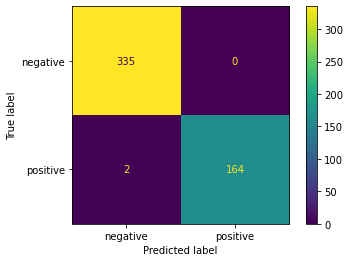

In [27]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_predict)

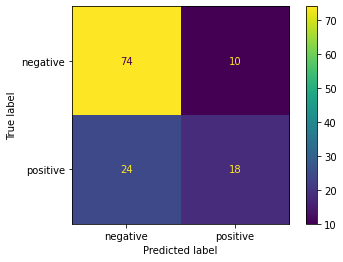

In [28]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [29]:
# Metrics calculation for binary classes
print('Precision:', precision_score(y_test, y_test_bow_predict, pos_label = 'positive'))
print('Recall:', recall_score(y_test, y_test_bow_predict, pos_label = 'positive'))
print('F1:', f1_score(y_test, y_test_bow_predict, pos_label = 'positive'))

Precision: 0.6428571428571429
Recall: 0.42857142857142855
F1: 0.5142857142857143


In [30]:
# Metrics calculation for more than two classes
print('Precision:', precision_score(y_test, y_test_bow_predict, average = None))
print('Recall:', recall_score(y_test, y_test_bow_predict, average = None))
print('F1:', f1_score(y_test, y_test_bow_predict, average = None))

Precision: [0.75510204 0.64285714]
Recall: [0.88095238 0.42857143]
F1: [0.81318681 0.51428571]


### Entrenamiento y evaluación de un modelo usando TF-IDF

In [31]:
model = RandomForestClassifier()

In [32]:
model.fit(X_tfidf, y_train)

RandomForestClassifier()

In [33]:
y_train_tfidf_predict = model.predict(X_tfidf)
y_test_tfidf_predict = model.predict(bow.transform(X_test))

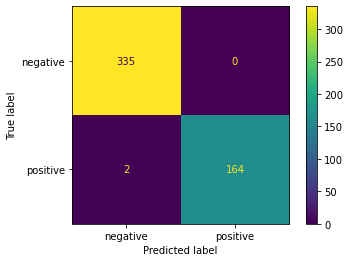

In [34]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

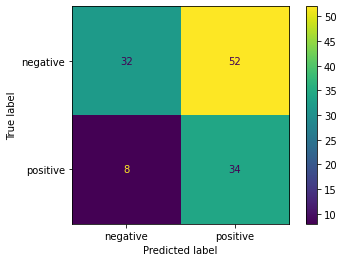

In [35]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

In [36]:
# Metrics calculation for binary classes
print('Precision:', precision_score(y_test, y_test_tfidf_predict, pos_label = 'positive'))
print('Recall:', recall_score(y_test, y_test_tfidf_predict, pos_label = 'positive'))
print('F1:', f1_score(y_test, y_test_tfidf_predict, pos_label = 'positive'))

Precision: 0.3953488372093023
Recall: 0.8095238095238095
F1: 0.53125


In [37]:
# Metrics calculation for more than two classes
print('Precision:', precision_score(y_test, y_test_tfidf_predict, average = None))
print('Recall:', recall_score(y_test, y_test_tfidf_predict, average = None))
print('F1:', f1_score(y_test, y_test_tfidf_predict, average = None))

Precision: [0.8        0.39534884]
Recall: [0.38095238 0.80952381]
F1: [0.51612903 0.53125   ]


### ¿Cómo interpretar los resultados?

<table>
    <tbody>
        <tr>
            <td>
                <img src="./imgs/confusion-matrix.png" style="height: 400px;">
            </td>
            <td>
                <img src="./imgs/precision-recall.png" style="height: 600px;">
            </td>
        </tr>
    </tbody>
</table>

### Analizando errores

In [38]:
error_df = pd.concat(
    [ pd.concat([X_test, y_test ], axis = 1).reset_index(),
    pd.Series(y_test_bow_predict) ]
, axis = 1).rename(columns = { 'sentiment': 'actual', 0: 'predicted' })

error_df.drop('index', inplace = True, axis = 1)

In [39]:
error_df.shape

(126, 3)

In [40]:
error_df.loc[error_df['actual'] != error_df['predicted']].head()

,full_text,actual,predicted
0,Petro promete reanudar relaciones diplomáticas con Maduro si gana elecciones en Colombia\n#TalCual #ClaroyRaspao #AmigosDeNuevo \nhttps://t.co/Kpm7VZydwZ https://t.co/xyy0uPwwzZ,negative,positive
5,"En #QuímicaEnLaFórmula, la candidata Ingrid Betancourt contó qué tanto sabe de su fórmula, en el camino a la Presidencia de Colombia ⬇️ https://t.co/KTgkWN1G2H",positive,negative
7,AMÉRICA LATINA\nGolpe al uribismo y avance de la izquierda\na semanas de las elecciones en Colombia - \nhttps://t.co/DsJ3kKO3b6,positive,negative
8,"Episodio 8 - En este nuevo episodio Alicia Eugenia Silva nos plantea una reflexión, en estas elecciones ¿el país sigue polarizado? o ¿nace un nuevo bipartidismo en Colombia? https://t.co/HYnK26DpNn via @YouTube",positive,negative
10,Uribe y sus aliados siembran zozobra para suspender elecciones en colombia 🇨🇴 https://t.co/wPM7Wft8bo,negative,positive


NameError: name 'stop' is not defined